## Metody Nieparametryczne w Statystyce
# Zadanie 7
Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa-Smirnowa w przypadku, gdy rozważane próbki danych pochodzą w rozkładów normalnych o tej samej wartości oczekiwanej, ale o różnych odchyleniach standardowych. Rozważyć różne wartości oczekiwane.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek

In [3]:
import numpy as np, pandas as pd
from scipy.stats import norm, kstest

2. Badanie mocy testu Kołmogorowa-Smirnowa dla dwóch zestawów danych z rozkładów normalnych o różnych odchyleniach standardowych.

<Axes: xlabel='std', ylabel='statistical power'>

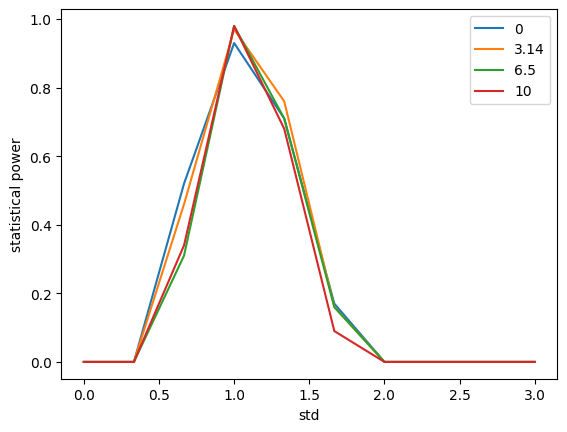

In [4]:
results = pd.DataFrame(columns=["0", "3.14", "6.5", "10"])
buf = []

for sigma in range (0, 10):
    for i in range (0, 100):
        for m in [0, 3.14, 6.5, 10]:
            #generowanie dwóch wektorów liczbowych o rozkładzie normalnym o średniej m i różnych odchyleniach standardowych
            x1 = norm.rvs(m, 1, size=200)
            x2 = norm.rvs(m, sigma / 3, size=200)
            
            #test kolmogorova-smirnova
            buf.append(kstest(x1, x2)[1] > .05)

    results.loc[sigma / 3] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
results.plot(xlabel="std", ylabel="statistical power")

Test ma wysoką moc dla sytuacji, gdy odchylenia standardowe obydwu próbek są do siebie zbliżone. Oznacza to, że gdy próbki są do siebie podobne, test ma mniejszy odsetek odrzucania prawdziwej hipotezy zerowej.